# ST3189 Assignment 1

## Question 1

1. Consider polynomial regression models for the target variable ‘mpg’ based on
the input variable horsepower. Train these models and provide plots to depict
the fit of them on the training data. 

### Importing relevant packages

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### Loading Data

In [15]:
auto = pd.read_csv("Auto.csv")

In [16]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [17]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [30]:
auto = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype(int)
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>],
       [<AxesSubplot:title={'center':'model year'}>,
        <AxesSubplot:title={'center':'origin'}>, <AxesSubplot:>]],
      dtype=object)

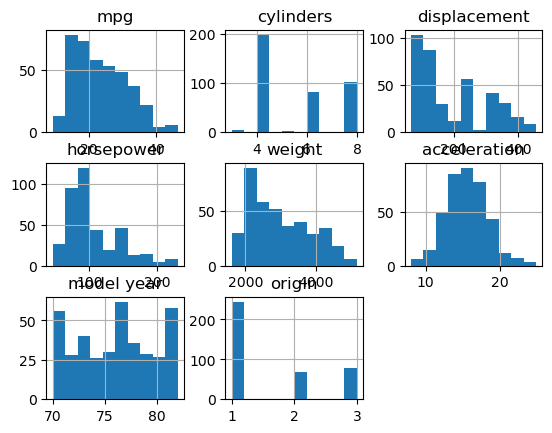

In [31]:
auto.hist()

In [32]:
auto_sorted= auto.sort_values('horsepower')
auto_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 19 to 116
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.1+ KB


In [33]:
X = auto_sorted['horsepower'].values.reshape(-1,1)
y = auto_sorted['mpg'].values.reshape(-1,1)

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)
mse_lin = mean_squared_error(y, y_pred_lin)

In [35]:
poly_features = PolynomialFeatures(degree = 2)
X_poly = poly_features.fit_transform(X)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)
y_pred_poly = lin_reg_poly.predict(X_poly)
mse_poly = mean_squared_error(y, y_pred_poly)

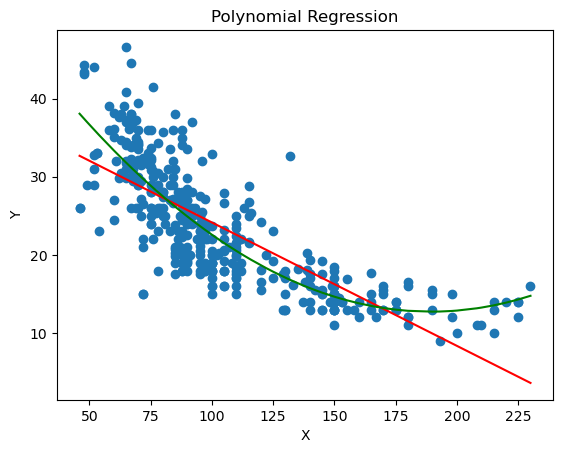

In [36]:
plt.scatter(X, y)
plt.plot(X, y_pred_lin, color='red')
plt.plot(X, y_pred_poly, color = 'green')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [37]:
print("MSE Linear Regression:", mse_lin)
print("MSE Polynomial Regression (degree 2):", mse_poly)

MSE Linear Regression: 23.943662938603108
MSE Polynomial Regression (degree 2): 18.984768907617216


## Question 2

2. Compare polynomial regression models of different order and identify the best
among them in terms of test error. Use cross-validation for the estimation of the
test error. 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100 )

In [55]:
models = []
mse = []
for degree in [1, 2, 3, 9]:
    # Create polynomial features up to the specified degree
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)

    # Fit a linear regression model to the polynomial features
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Store the model and polynomial features in a dictionary
    models.append({'degree': degree, 'model': model, 'poly_features': poly_features})

    # Compute the mean squared error on the test set using cross-validation
    scores = cross_val_score(model, poly_features.transform(X_test), y_test, cv=3, scoring='neg_mean_squared_error')
    mse.append(-np.mean(scores))

    # Print the mean squared error for the current model
    print(f"Degree {degree} model's mean squared error: {mse[-1]}")

Degree 1 model's mean squared error: 25.9148228804475
Degree 2 model's mean squared error: 22.071961844147296
Degree 3 model's mean squared error: 23.601098513392014
Degree 9 model's mean squared error: 29.59437537062298


## Question 3

3. Apply the k-nearest-neighbours model to with `horsepower’ and `weight’ as
inputs and ‘origin’ as target. Split the data into a train and test sample, train
models with different values of k, extract predictions from these models and
compare them graphically on the test data as done in the lecture notes
(scatterplots of ‘horsepower’ and ‘weight’ with the points labelled by their true
label or the predicted labels from the k-nearest-neighbours models). 

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

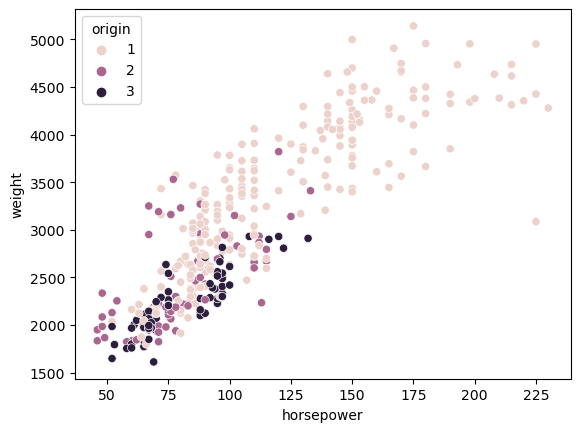

In [62]:
sns.scatterplot(x= 'horsepower', y= 'weight', hue = 'origin', data = auto)

In [63]:
X = auto[['horsepower', 'weight']]
y = auto['origin']
X_train, X_test, y_train, y_test = train_test_split(auto[['horsepower', 'weight']], auto['origin'], test_size=0.3, random_state=42)

In [66]:
k_values = [1,3,10,25]
models = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    models.append(model)

In [67]:
predictions = []
for model in models:
    prediction = model.predict(X_test)
    predictions.append(prediction)

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

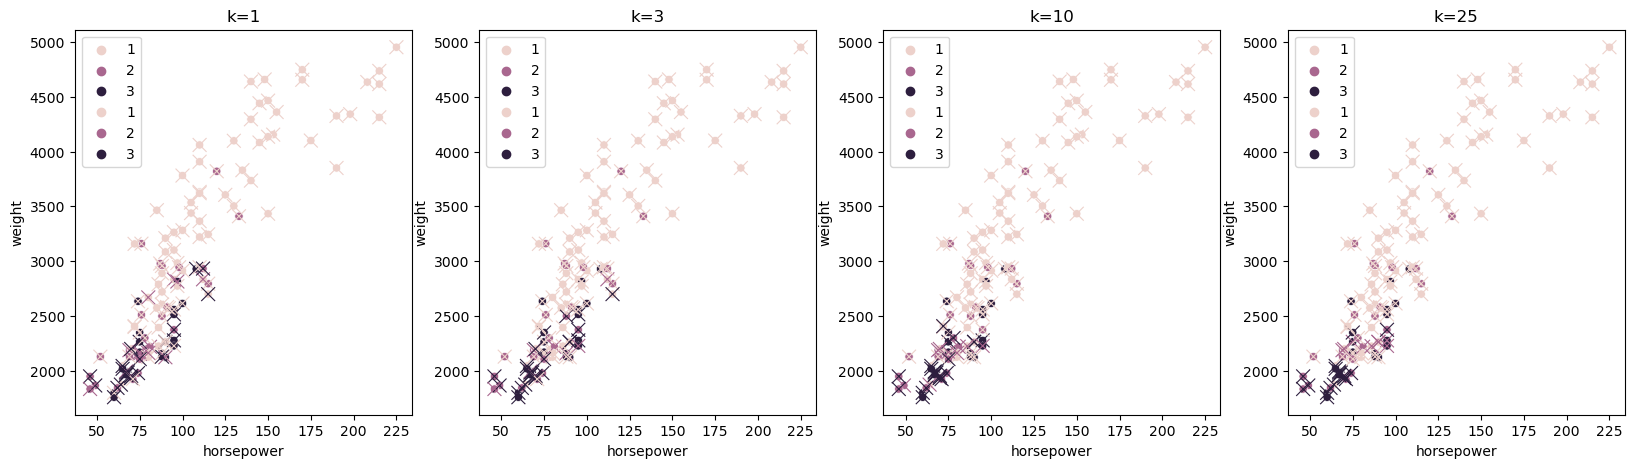

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=len(k_values), figsize=(20, 5))
for i, ax in enumerate(axes):
    sns.scatterplot(x=X_test['horsepower'], y=X_test['weight'], hue=y_test, ax=ax)
    ax.set_title(f"k={k_values[i]}")
    sns.scatterplot(x=X_test['horsepower'], y=X_test['weight'], hue=predictions[i], ax=ax, marker='x', s=100)
plt.show()

In [71]:
accuracies = []
for prediction in predictions:
    accuracy = accuracy_score(y_test, prediction)
    accuracies.append(accuracy)

In [73]:
comparison = pd.DataFrame({'Actual': y_test.values, 'k=1': predictions[0], 'k=3': predictions[1], 'k=10': predictions[2], 'k=25': predictions[3]})

for i, k in enumerate(k_values):
    print(f"Accuracy for k={k}: {accuracies[i]:.2f}")
print("\nComparison of Actual vs. Predicted Values:")
print(comparison)

Accuracy for k=1: 0.61
Accuracy for k=3: 0.62
Accuracy for k=10: 0.61
Accuracy for k=25: 0.62

Comparison of Actual vs. Predicted Values:
     Actual  k=1  k=3  k=10  k=25
0         2    2    2     2     2
1         2    1    1     1     1
2         3    1    3     3     3
3         1    3    3     3     3
4         1    1    1     1     1
..      ...  ...  ...   ...   ...
113       1    1    1     1     1
114       3    3    3     3     3
115       3    1    1     1     1
116       1    1    1     1     1
117       1    1    1     1     1

[118 rows x 5 columns]
